In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

# Load dataset
file_path = "health_insurance_dataset_updated.csv"  # Ensure the correct path
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Age,Gender,BMI,Smoke,Health Problem,No. of Hospital Visits,Claim Amount Requested (₹),Approval Status
0,69,Female,26.3,No,Hypertension,12,178681,Rejected
1,32,Female,34.9,Yes,Diabetes,5,337712,Rejected
2,89,Male,29.8,No,Hypertension,9,147053,Rejected
3,78,Male,17.4,No,Heart Disease,5,42978,Approved
4,38,Male,28.7,No,Hypertension,2,301237,Rejected


In [3]:
print(df.isnull().sum())  # Ensure no missing values


Age                           0
Gender                        0
BMI                           0
Smoke                         0
Health Problem                0
No. of Hospital Visits        0
Claim Amount Requested (₹)    0
Approval Status               0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male=1, Female=0
df['Smoke'] = encoder.fit_transform(df['Smoke'])  # Yes=1, No=0
df['Health Problem'] = encoder.fit_transform(df['Health Problem'])  # Assigns numerical labels
df['Approval Status'] = encoder.fit_transform(df['Approval Status'])  # Approved=1, Rejected=0

df.head()


,Age,Gender,BMI,Smoke,Health Problem,No. of Hospital Visits,Claim Amount Requested (₹),Approval Status
0,69,0,26.3,0,2,12,178681,1
1,32,0,34.9,1,0,5,337712,1
2,89,1,29.8,0,2,9,147053,1
3,78,1,17.4,0,1,5,42978,0
4,38,1,28.7,0,2,2,301237,1


In [5]:
# Selecting features and target
X = df.drop(columns=["Approval Status"])  # Independent variables
y = df["Approval Status"]  # Target variable (0: Rejected, 1: Approved)


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4800, 7)
Testing set size: (1200, 7)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 91.67%


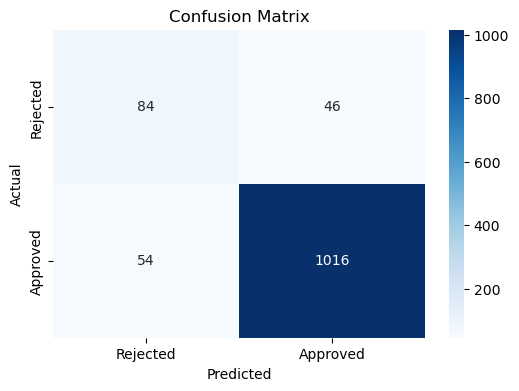

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
import joblib

# Save trained model
joblib.dump(model, "health_claim_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [14]:
sample_data = [[28, 0, 24.0, 0, 0, 2, 30000]]  # Younger, lower BMI, no health issues
sample_df = pd.DataFrame(sample_data, columns=feature_names)

prediction = loaded_model.predict(sample_df)
print("Predicted Approval Status:", "Approved" if prediction[0] == 1 else "Rejected")


Predicted Approval Status: Rejected


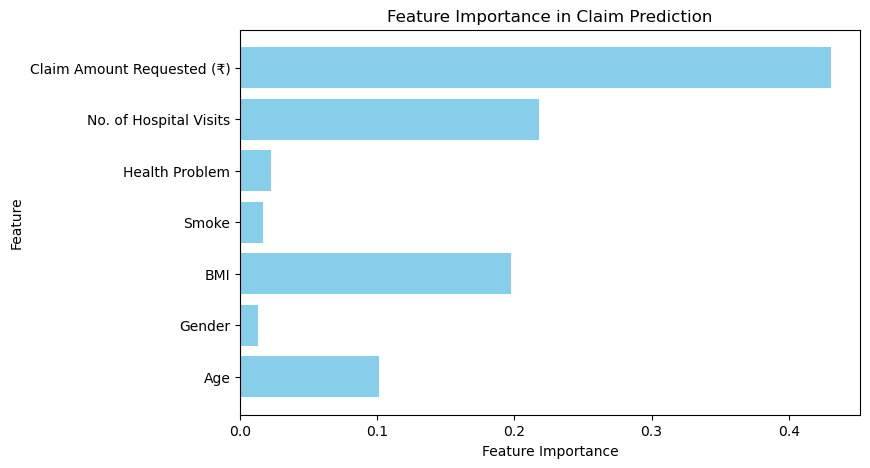

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
feature_names = ["Age", "Gender", "BMI", "Smoke", "Health Problem", "No. of Hospital Visits", "Claim Amount Requested (₹)"]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Claim Prediction")
plt.show()


In [16]:
df["Approval Status"].value_counts()


Approval Status
1    5268
0     732
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Balanced Data Shape:", X_resampled.shape)


Balanced Data Shape: (10536, 7)


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Balanced Data Shape:", X_resampled.shape)


Balanced Data Shape: (10536, 7)


In [19]:
# Split balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train again
model.fit(X_train, y_train)

# Save new model
joblib.dump(model, "health_claim_model_balanced.pkl")


['health_claim_model_balanced.pkl']

In [20]:
# Improve Random Forest Model
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42)

# Train Again
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [22]:
import pandas as pd

# Define column names (same as training data)
feature_names = ["Age", "Gender", "BMI", "Smoke", "Health Problem", "No. of Hospital Visits", "Claim Amount Requested (₹)"]

# Sample input data (Make sure values are in the correct order)
sample_data = [[30, 1, 28.5, 0, 1, 3, 50000]]

# Convert to DataFrame with column names
sample_df = pd.DataFrame(sample_data, columns=feature_names)

# Predict using the trained model
prediction = loaded_model.predict(sample_df)

# Output result
print("Predicted Approval Status:", "Approved" if prediction[0] == 1 else "Rejected")


Predicted Approval Status: Rejected
